#Zadatak 1 - Korištenje CNN za klasifikaciju

U ovom zadatku ćemo koristiti CNN kako bismo riješili problem klasifikacije slika. Skup podataka koji ćemo koristiti je CIFAR-10. Ovaj skup predstavlja jedan od standarnih skupova podataka koji se koriste u računarskoj viziji i
dubokom učenju. Iako se klasifikacijski zadatak na ovom skupu podataka smatra ’riješenim’, može se koristiti kao osnova za učenje i vježbanje razvoja, evaluacije, i korištenja konvolucionih neuronskih mreža za zadatak klasifikacije
slika.

CIFAR-10 je skraćenica od Canadian Institute For Advanced Research. Sadrži 60 000 RGB slika dimenzija 32×32
piksela. Slike su različitih objekata, i pripadaju 10 klasa, i to: airplane (0), automobile (1), bird (2), cat (3), deer
(4), dog (5), frog (6), horse (7), ship (8), truck (9). Ovaj skup podataka je dosta dobro istražen, te se često koristi
za testiranje algoritama računarske vizije iz oblasti mašinskog učenja. Relativno je jednostavno postići tačnost od
oko 80% prilikom klasifikacije. Bolje rezultate od toga je moguće postići sa CNN.

a) Učitati CIFAR-10 skup podataka, i ispisati oblik trening i test podataka i labela;

In [ ]:
from keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data()

print("Oblik trening podataka:", trainX.shape)
print("Oblik trening labela:", trainy.shape)
print("Oblik test podataka:", testX.shape)
print("Oblik test labela:", testy.shape)

Oblik trening podataka: (50000, 32, 32, 3)
Oblik trening labela: (50000, 1)
Oblik test podataka: (10000, 32, 32, 3)
Oblik test labela: (10000, 1)


b) Pomoću Matplotlib (tj. pyplot) iscrtati prvih 9 slika ovog skupa podataka. Šta možete reći o slikama? Da li ova
rezolucija odgovara rezoluciji modernih fotografija? Kako bi rezolucija slike mogla djelovati na rad algoritama
i modela mašinskog učenja prilikom klasifikacije?

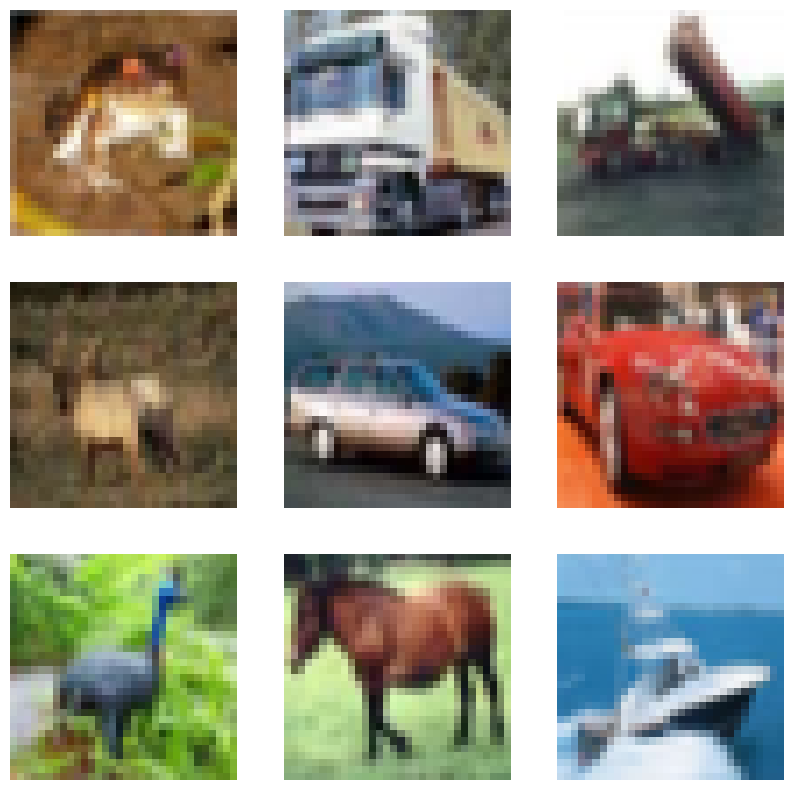

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(trainX[i])
    plt.axis('off')
plt.show()


Nakon što su podaci učitani, potrebno je iste predprocesirati. U tu svrhu, potrebno je labele pretvoriti u nizove od
10 elemenata (to jeste izvršiti one-hot enkodiranje), a same fotografije (to jeste podatke) je potrebno pretvoriti u
tip float32 te skalirati na opsegu od 0 do 1. Obzirom da znamo da je maksimalna vrijednost nekog kanala 255,
skaliranje možemo postići jednostavnim dijeljenjem sa 255.

c) Pripremiti podatke za treniranje. Za labele, potrebno je koristiti funkciju to_categorical, dok je za trening
podatke potrebno koristiti astype za pretvorbu u floating-point tip, te dijeljenje sa 255 za korak skaliranja
podataka.

In [ ]:
from keras.utils import to_categorical

trainy = to_categorical(trainy)
testy = to_categorical(testy)

trainX = trainX.astype('float32') / 255
testX = testX.astype('float32')/255

Naredni korak je definisanje modela. Obično se kreira pomoćna funkcija koja kao rezultat vraća gotov model. To
se radi iz razloga što je često potrebno mijenjati arhitekturu modela, te eksperimentisati sa različitim slojevima.

d) Definisati pomoćnu funkciju za kreiranje modela. Za sada, funkcija će praviti jednostavan CNN (ovo se još
naziva i baseline model). Model treba imati sljedeće slojeve:
• Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
• Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
• MaxPooling2D sloj dimenzija 2×2;
• Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
• Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
• MaxPooling2D sloj dimenzija 2×2;
• Flatten sloj;
• Dense sloj sa 128 neurona, koji koristi relu aktivacijsku funkciju;
• Izlazni Dense sloj sa 10 neurona i softmax aktivacijskom funkcijom.

e) Dodati potrebni kod za kompajliranje modela u funkciju define_model. Optimizator treba biti gradient
descent uz stopu učenja od 0.001 i momentum od 0.9, to jeste:

opt = SGD(lr=0.001, momentum=0.9)

Kompajliranje se treba vršiti na način da se za funkciju gubitka koristi categorical_crossentropy, a za
metrike accuracy. Liniju za kompajliranje modela dodati na kraj pomoćne funkcije. Optimizator treba biti
SGD definisan u prethodnom podzadatku.
Sada je potrebno istrenirati model. Parametri koji će biti korišteni za treniranje su sljedeći:
• epochs=15;
• batch_size=64;
• validation_data=(testX, testY) (obično bi se kreirao poseban skup za validaciju, ali u ovom primjeru
ćemo koristiti testni skup);

In [ ]:
from keras import layers
from keras import models
from keras.optimizers import SGD

def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

f) Izvršiti treniranje i evaluaciju modela. Kolika je postignuta tačnost? Da li je ovo zadovoljavajuće?

In [ ]:

model = define_model()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/15
782/782 [==============================] - 252s 321ms/step - loss: 1.6887 - accuracy: 0.3885 - val_loss: 1.3349 - val_accuracy: 0.5109
Epoch 2/15
782/782 [==============================] - 258s 330ms/step - loss: 1.1948 - accuracy: 0.5737 - val_loss: 1.0904 - val_accuracy: 0.6112
Epoch 3/15
782/782 [==============================] - 237s 304ms/step - loss: 0.9474 - accuracy: 0.6637 - val_loss: 0.9101 - val_accuracy: 0.6827
Epoch 4/15
782/782 [==============================] - 236s 301ms/step - loss: 0.7839 - accuracy: 0.7220 - val_loss: 0.9201 - val_accuracy: 0.6747
Epoch 5/15
782/782 [==============================] - 226s 288ms/step - loss: 0.6495 - accuracy: 0.7709 - val_loss: 0.8866 - val_accuracy: 0.6972
Epoch 6/15
782/782 [==============================] - 236s 302ms/step - loss: 0.5331 - accuracy: 0.8116 - val_loss: 0.9171 - val_accuracy: 0.7070
Epoch 7/15
782/782 [==============================] - 236s 302ms/step - loss: 0.4231 - accuracy: 0.8504 - val_loss: 0.9182 -

g) Izvršiti plot ponašanja tačnost i i gubitka kroz epohe. Šta možete zaključiti iz plotova?

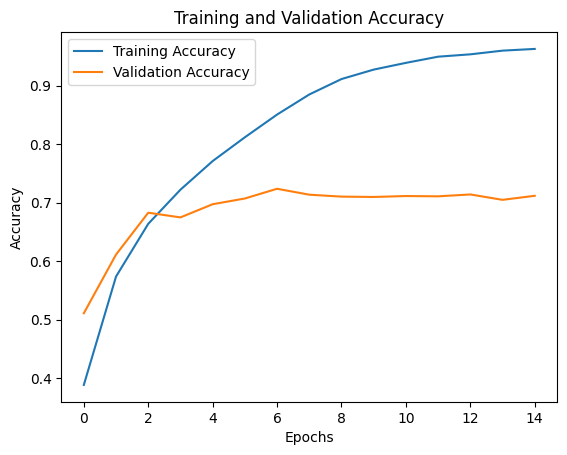

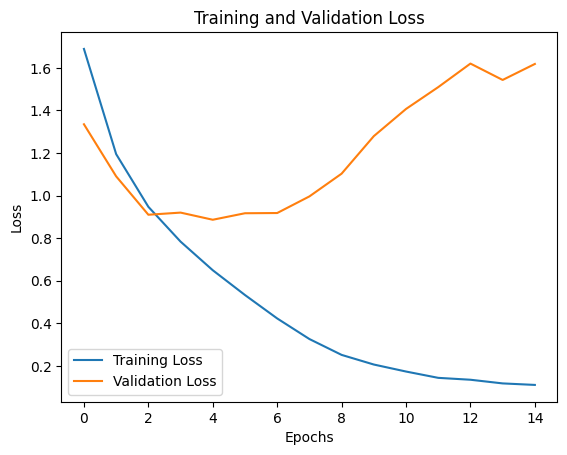

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Nakon što smo napravili baseline model, možemo isti optimizirati. U prethodnom modelu nalazi se potpuno povezani
sloj od 128 neurona. Ovaj sloj zapravo uzima sve značajke i koristi ih za treniranje. Međutim, kako bi se spriječio
overfitting, moguće je nasumično onemogućiti neke neurone tokom treniranja. Kako bi se to postiglo, koristi se
Dropout sloj. Ovo pomaže robusnosti mreže, te spriječava overfitting, na način da tokom treniranja neuroni neće
učiti uvijek, već imaju šansu da budu odbačeni (od čega i naziv sloja). Na taj način, može se spriječiti da model
trening značajke nauči previše dobro.

h) Dodati Dropout sloj u model, sa vjerovatnoćom od 0.5, prije prvog Dense sloja. Ponoviti treniranje, evalu-
aciju, i plotanje gubitka i tačnosti. Da li su postignuti rezultati bolji? Da li sada nastaje overfitting?

In [ ]:
from keras.layers import Dropout

def define_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    opt = SGD(lr=0.001, momentum = 0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_with_dropout()
history = model.fit(trainX, trainy, epochs=15, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/15
782/782 [==============================] - 243s 310ms/step - loss: 1.8073 - accuracy: 0.3377 - val_loss: 1.4180 - val_accuracy: 0.4830
Epoch 2/15
782/782 [==============================] - 234s 299ms/step - loss: 1.3273 - accuracy: 0.5203 - val_loss: 1.2297 - val_accuracy: 0.5621
Epoch 3/15
782/782 [==============================] - 230s 294ms/step - loss: 1.1058 - accuracy: 0.6056 - val_loss: 0.9767 - val_accuracy: 0.6544
Epoch 4/15
782/782 [==============================] - 240s 307ms/step - loss: 0.9670 - accuracy: 0.6573 - val_loss: 0.9111 - val_accuracy: 0.6782
Epoch 5/15
782/782 [==============================] - 229s 292ms/step - loss: 0.8748 - accuracy: 0.6925 - val_loss: 0.8136 - val_accuracy: 0.7162
Epoch 6/15
782/782 [==============================] - 238s 305ms/step - loss: 0.7987 - accuracy: 0.7199 - val_loss: 0.7683 - val_accuracy: 0.7323
Epoch 7/15
782/782 [==============================] - 238s 305ms/step - loss: 0.7319 - accuracy: 0.7425 - val_loss: 0.7570 -

i) Sada ćemo napraviti konačnu verziju našeg modela. Nad postojećim modelom, izvršiti sljedeće izmjene:
1) Prije Flatten sloja, dodati još jedan blok od dva Conv2D sloja i jednog MaxPooling2D sloja, po uzoru
na već postojeće blokove. Postaviti broj filtera za dva Conv2D sloja na 128;
2) Postojeći Dropout promijeniti na 0.2, te ga pomjeriti nakon prvog Dense sloja;
3) Nakon svakog MaxPooling2d sloja, dodati Dropout sloj sa vjerovatnoćom 0.2.

In [ ]:
def define_final_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    opt = SGD(lr=0.001, momentum = 0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_final_model()
history = model.fit(trainX, trainy, epochs=30, batch_size=64, validation_data=(testX, testy))

_, accuracy = model.evaluate(testX, testy)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/30
782/782 [==============================] - 338s 430ms/step - loss: 1.9227 - accuracy: 0.2884 - val_loss: 1.5408 - val_accuracy: 0.4378
Epoch 2/30
782/782 [==============================] - 331s 424ms/step - loss: 1.4453 - accuracy: 0.4742 - val_loss: 1.2430 - val_accuracy: 0.5436
Epoch 3/30
782/782 [==============================] - 337s 430ms/step - loss: 1.2231 - accuracy: 0.5623 - val_loss: 1.0162 - val_accuracy: 0.6393
Epoch 4/30
782/782 [==============================] - 336s 429ms/step - loss: 1.0486 - accuracy: 0.6271 - val_loss: 0.9145 - val_accuracy: 0.6776
Epoch 5/30
782/782 [==============================] - 334s 427ms/step - loss: 0.9246 - accuracy: 0.6775 - val_loss: 0.8226 - val_accuracy: 0.7070
Epoch 6/30
782/782 [==============================] - 335s 428ms/step - loss: 0.8402 - accuracy: 0.7061 - val_loss: 0.7621 - val_accuracy: 0.7344
Epoch 7/30
782/782 [==============================] - 332s 424ms/step - loss: 0.7630 - accuracy: 0.7333 - val_loss: 0.7288 -

Ovakav model je potrebno trenirati 30 epoha. Koja je dobijena tačnost? Da li dolazi do overfitting-a?